# Análise Exploratória de Dados (Data Exploratory Analysis - EDA)

Dataset xWine

- Reconhecimento do dataset
- Construção de Perfil de Usuário
- Construção de Perfil de Conteúdo

In [2]:
# Análise Exploratório de Dados (Data Exploratory Analysis - EDA)

# Importando as bibliotecas
import numpy as np 
import pandas as pd
import seaborn as sns

# Carregando o dataset
vinhos_dados_arq_csv = 'data/XWines_Slim_1K_wines.csv'
vinhos_avals_arq_csv = 'data/XWines_Slim_150K_ratings.csv'

vinhos_dados = pd.read_csv(vinhos_dados_arq_csv)
vinhos_avals = pd.read_csv(vinhos_avals_arq_csv, low_memory=False)

In [7]:
vinhos_dados.sample(10).T

,369,909,20,511,677,119,500,781,247,430
WineID,131656,193484,100055,154979,169260,105488,149550,179061,111927,140010
WineName,Bobal Tierra de Castilla,Sauvignon Blanc,Millesimé Cabernet Sauvignon,Fior di Vigna Dolce Rosso,Malbec Rosé,Touriga Nacional,Barolo Riserva,Insignia,Rare Vintage Brut Champagne,Rosso di Montalcino
Type,Red,White,Red,Dessert,Rosé,Red,Red,Red,Sparkling,Red
Elaborate,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Assemblage/Champagne Blend,Varietal/100%
Grapes,['Bobal'],['Sauvignon Blanc'],['Cabernet Sauvignon'],['Brachetto'],['Malbec'],['Touriga Nacional'],['Nebbiolo'],['Pinot Noir'],"['Chardonnay', 'Pinot Noir', 'Pinot Meunier']",['Sangiovese']
Harmonize,"['Beef', 'Pasta', 'Veal', 'Poultry']","['Shellfish', 'Vegetarian', 'Goat Cheese']","['Beef', 'Lamb', 'Poultry']","['Chocolate', 'Sweet Dessert', 'Fruit']","['Beef', 'Spicy Food', 'Maturated Cheese', 'Ha...","['Beef', 'Pasta', 'Lamb', 'Game Meat']","['Beef', 'Pasta', 'Lamb', 'Game Meat', 'Hard C...","['Beef', 'Lamb', 'Game Meat', 'Poultry']","['Pork', 'Rich Fish', 'Shellfish', 'Soft Cheese']","['Beef', 'Lamb', 'Veal', 'Poultry', 'Cured Meat']"
ABV,13.5,13.0,13.0,4.0,12.5,13.5,14.5,14.5,12.0,14.0
Body,Full-bodied,Light-bodied,Full-bodied,Full-bodied,Medium-bodied,Very full-bodied,Full-bodied,Full-bodied,Medium-bodied,Medium-bodied
Acidity,High,High,High,Low,Medium,High,High,Medium,High,Medium
Code,ES,NZ,BR,IT,AR,PT,IT,US,FR,IT


<Axes: xlabel='RegionID'>

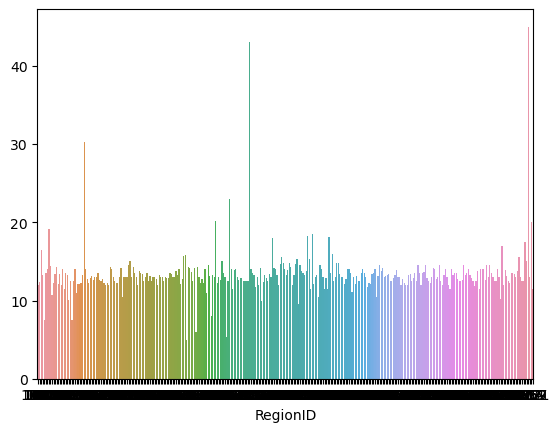

In [77]:
media_alcool = vinhos_dados.groupby('RegionID')['ABV'].mean()
sns.barplot(x=media_alcool.index, y=media_alcool.values)

In [78]:
vinhos_avals.head(2).T

,0,1
RatingID,143,199
UserID,1356810,1173759
WineID,103471,111415
Vintage,1950,1951
Rating,4.5,5.0
Date,2021-11-02 20:52:59,2015-08-20 17:46:26


In [1]:
vinhos = pd.merge(vinhos_dados, vinhos_avals, on='WineID')

vinhos.sample(2).T

NameError: name 'pd' is not defined

In [80]:
usuario_seg = vinhos.groupby('UserID')['Rating'].mean()
usuario_seg.head(10)

UserID
1000004    3.884615
1000010    4.086957
1000021    4.058824
1000023    4.157895
1000024    3.863636
1000025    3.839286
1000027    4.236842
1000029    3.875000
1000031    3.750000
1000036    4.050000
Name: Rating, dtype: float64

In [81]:
# usuários com melhores avaliações 
usuario_seg.sort_values(ascending=False).head(10)

UserID
1979847    5.0
1902206    5.0
1164726    5.0
1920180    5.0
1026510    5.0
1213224    5.0
1422813    5.0
1061784    5.0
1903513    5.0
1037950    5.0
Name: Rating, dtype: float64

In [82]:
# Melhores vinhos
vinhos.groupby('WineID')['Rating'].mean().sort_values(ascending=False).head(10)

WineID
182711    4.807692
144337    4.794118
181199    4.794118
174184    4.758488
112084    4.757212
180330    4.728261
182169    4.722222
111415    4.717333
183379    4.714286
181280    4.712500
Name: Rating, dtype: float64

In [83]:
vinhos[vinhos['WineID'] == 182711].T

,140155,140156,140157,140158,140159,140160,140161,140162,140163,140164,140165,140166,140167
WineID,182711,182711,182711,182711,182711,182711,182711,182711,182711,182711,182711,182711,182711
WineName,Solari,Solari,Solari,Solari,Solari,Solari,Solari,Solari,Solari,Solari,Solari,Solari,Solari
Type,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
Elaborate,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%,Varietal/100%
Grapes,['Cabernet Sauvignon'],['Cabernet Sauvignon'],['Cabernet Sauvignon'],['Cabernet Sauvignon'],['Cabernet Sauvignon'],['Cabernet Sauvignon'],['Cabernet Sauvignon'],['Cabernet Sauvignon'],['Cabernet Sauvignon'],['Cabernet Sauvignon'],['Cabernet Sauvignon'],['Cabernet Sauvignon'],['Cabernet Sauvignon']
Harmonize,"['Beef', 'Lamb', 'Game Meat', 'Maturated Chees...","['Beef', 'Lamb', 'Game Meat', 'Maturated Chees...","['Beef', 'Lamb', 'Game Meat', 'Maturated Chees...","['Beef', 'Lamb', 'Game Meat', 'Maturated Chees...","['Beef', 'Lamb', 'Game Meat', 'Maturated Chees...","['Beef', 'Lamb', 'Game Meat', 'Maturated Chees...","['Beef', 'Lamb', 'Game Meat', 'Maturated Chees...","['Beef', 'Lamb', 'Game Meat', 'Maturated Chees...","['Beef', 'Lamb', 'Game Meat', 'Maturated Chees...","['Beef', 'Lamb', 'Game Meat', 'Maturated Chees...","['Beef', 'Lamb', 'Game Meat', 'Maturated Chees...","['Beef', 'Lamb', 'Game Meat', 'Maturated Chees...","['Beef', 'Lamb', 'Game Meat', 'Maturated Chees..."
ABV,14.3,14.3,14.3,14.3,14.3,14.3,14.3,14.3,14.3,14.3,14.3,14.3,14.3
Body,Very full-bodied,Very full-bodied,Very full-bodied,Very full-bodied,Very full-bodied,Very full-bodied,Very full-bodied,Very full-bodied,Very full-bodied,Very full-bodied,Very full-bodied,Very full-bodied,Very full-bodied
Acidity,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium
Code,US,US,US,US,US,US,US,US,US,US,US,US,US


In [84]:
filtro = (vinhos['Type'] == 'Red') & (vinhos['Grapes'].str.contains('Cabernet Sauvignon'))
vinhos[filtro].groupby('WineID')['Rating'].mean().sort_values(ascending=False).head(10)

WineID
182711    4.807692
180330    4.728261
182169    4.722222
111415    4.717333
183379    4.714286
181280    4.712500
111395    4.687269
162497    4.655635
179043    4.633793
179855    4.630719
Name: Rating, dtype: float64

In [85]:
uvas = vinhos['Grapes'].str.split(',', expand=True).stack().str.replace('[', '').str.replace(']', '').str.strip()
uvas = uvas.reset_index(level=1, drop=True).rename('Grape')

vinhos_combinados = vinhos.join(uvas)
vinhos_combinados.head(2).T

,0,1
WineID,100001,100001
WineName,Espumante Moscatel,Espumante Moscatel
Type,Sparkling,Sparkling
Elaborate,Varietal/100%,Varietal/100%
Grapes,['Muscat/Moscato'],['Muscat/Moscato']
Harmonize,"['Pork', 'Rich Fish', 'Shellfish']","['Pork', 'Rich Fish', 'Shellfish']"
ABV,7.5,7.5
Body,Medium-bodied,Medium-bodied
Acidity,High,High
Code,BR,BR


In [86]:
usuario_por_uva = vinhos_combinados.groupby(['UserID', 'Grape']).agg({'Rating': 'mean'})
usuario_por_uva.head(10)

Rating
UserID  Grape                         
1000004 'Barbera'             3.500000
        'Cabernet Franc'      3.750000
        'Cabernet Sauvignon'  3.800000
        'Chardonnay'          4.142857
        'Gamay Noir'          2.500000
        'Limnio'              3.500000
        'Macabeo'             3.500000
        'Malbec'              3.750000
        'Merlot'              3.875000
        'Muscat/Moscato'      4.000000

In [119]:
usuario_por_uva_preferida = usuario_por_uva['Rating'].groupby('UserID').idxmax()
usuario_por_uva_preferida.head(10)

UserID
1000004          (1000004, 'Syrah/Shiraz')
1000010    (1000010, 'Cabernet Sauvignon')
1000021            (1000021, 'Chardonnay')
1000023            (1000023, 'Chardonnay')
1000024            (1000024, 'Chardonnay')
1000025        (1000025, 'Cabernet Franc')
1000027    (1000027, 'Cabernet Sauvignon')
1000029         (1000029, 'Pedro Ximenez')
1000031          (1000031, 'Petit Verdot')
1000036        (1000036, 'Mondeuse Noire')
Name: Rating, dtype: object

# Processo de recomendação

In [103]:
conteudo_caracteristicas = vinhos.drop_duplicates(subset=['Grapes', 'Country', 'Type'])
# conteudo_caracteristicas.head(2).T

# Perfil do conteúdo

In [108]:
conteudo_modelo = conteudo_caracteristicas.groupby(['Grapes', 'Country']).agg({'Rating': 'mean'})
conteudo_modelo.head(2)

,,Rating
Grapes,Country,
"[""Trebbiano d'Abruzzo""]",Italy,3.0
['Albariño'],Spain,3.5


# Perfil do usuário

In [107]:
usuario_modelo = vinhos.groupby('UserID').agg({'Rating': 'mean'})


# Recomendação

- selecionar um usuário específico
- obter o perfil do usuário selecionado
- comparar o perfil do usuário com o de conteúdo
- selecionar uma recomendação e exibir

In [131]:
usuario_id = 1000024

usuario = usuario_modelo.loc[usuario_id]

# Variáveis auxiliares/controle
melhor_recocomendacao = None
similaridade_alta = float('-inf')

# Interar sobre cada linha do modelo de conteúdo
for item_id, item_perfil in conteudo_modelo.iterrows():

    # similaridade = np.dot(usuario, item_perfil)
    similaridade = -abs(usuario['Rating'] - item_perfil['Rating'])

    if similaridade > similaridade_alta:
        similaridade_alta = similaridade
        melhor_recocomendacao = item_id

print(f'A melhor recomendação para o usuário {usuario_id} é: {melhor_recocomendacao}')


A melhor recomendação para o usuário 1000024 é: ("['Cabernet Sauvignon']", 'Italy')
